In [28]:
from modelzipper.tutils import *
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('stopwords')

# 英文停用词
stop_words = set(stopwords.words('english'))


context_length = "0k"
file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/{int(context_length[:-1])*1000-100}/ce"
 
# file_dir = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal/Meta-Llama-3.1-8B-Instruct/1900/ce"
# context_length = "2k"
file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max12k_sample200_gws/Meta-Llama-3.1-8B-Instruct/{max(int(context_length[:-1])*1000-100,0)}/label"
print(file_dir)
# file_dir = f"/data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/{max(0, int(context_length[:-1])*1000-100)}/label"
prefix = "3-hop*"
all_files = auto_read_dir(file_dir, file_prefix=prefix)
i = 0
all_files = [os.path.join(file_dir, x) for x in all_files]
len(all_files)

2025-01-22 00:40:44.644 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 3


/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max12k_sample200_gws/Meta-Llama-3.1-8B-Instruct/0/label


3

In [53]:
def random_combine(ref:list, att:list, return_snd_pos = False):

    att_list =[[] for _ in range(len(ref) + 1)]
    for p_att in att[:-1]:
        att_list[random.randint(0,len(ref)-1)].append(p_att)
    att_list[-1].append(att[-1])

    results = [k for k in att_list[0]]

    if return_snd_pos:
        insert_pos = list(range(len(results)))
    for r, patt in zip(ref,att_list[1:]):
        results.append(r)
        if return_snd_pos:
            insert_pos.extend(list(range(len(results), len(results) + len(patt))))

        results.extend(patt)
            
    if return_snd_pos:
        assert len(att) == len(insert_pos)
        return results, insert_pos

    return results


random_combine([1,2,3],['a','c'],return_snd_pos = True)

([1, 2, 'a', 3, 'c'], [2, 4])

In [37]:
single_data = auto_read_data(all_files[1])

(single_data[31]['grad']['score'],

single_data[31]['weight']['score'],
single_data[31]['saliency']['score'])

begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max12k_sample200_gws/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-0_pid-0_0-2-5-6.pkl | file size: 8.65 KB | file type: pkl


([0.9491174871271307, 0.6084113948601336, 1.1736810857599431, 0.0],
 [0.015868447043678978, 0.006052911774186063, 0.011384530500932173, 0.0],
 [0.0020977258682250977, 0.00035990910096602005, 0.0006244670261036266, 0.0])

100%|██████████| 495/495 [00:00<00:00, 23815.69it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-135_pid-3_2-4-5-6-8.pkl | file size: 825.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-49_pid-3_1-3-5-6-7.pkl | file size: 856.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-149_pid-0_1-4-5-6-7.pkl | file size: 858.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-21_pid-3_1-3-4-7-9.pkl | file size: 847.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instr

100%|██████████| 495/495 [00:00<00:00, 23590.55it/s]
/tmp/ipykernel_194264/3540389335.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-135_pid-3_2-4-5-6-8.pkl | file size: 825.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-49_pid-3_1-3-5-6-7.pkl | file size: 856.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-149_pid-0_1-4-5-6-7.pkl | file size: 858.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-21_pid-3_1-3-4-7-9.pkl | file size: 847.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instr

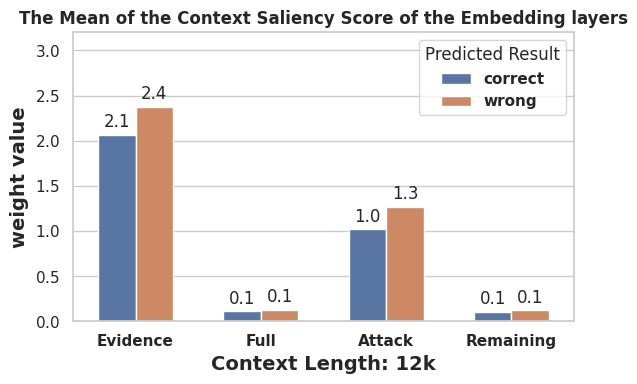

In [112]:


final_scores=[]


for score in [100,0]:
    all_predictions = []
    labels = []

    all_layer_scores = [0, 0, 0, 0]
    sample_numbers = 0
    for file in tqdm(all_files):
        settings = os.path.basename(file).split("_")
        hop, depth = settings[0], settings[1]
        label = hop.split("-")[-1].lower()
        content = auto_read_data(file)
        if content['score'] != score:continue
        sample_numbers += 1
        if content['score'] == 0:
            all_predictions.append(0)
            
        else:
            all_predictions.append(1)
                    
        # print(content['pred_res'], content['score'])
        # print(content[0])
        # break
        # 提取数据
        for i, s in enumerate(content['embedding']['score']):
            all_layer_scores[i] += s
    
    for i in range(len(all_layer_scores)):
        all_layer_scores[i]/= sample_numbers
    print(all_layer_scores,sample_numbers)
    final_scores.append(tuple(all_layer_scores))



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import FancyBboxPatch
# 示例数据
data = pd.DataFrame({
    'Context Type': ['Evidence', 'Full', 'Attack', 'Remaining'],
    'correct': final_scores[0],
    'wrong': final_scores[1],
})



# 将数据转换为长格式
data_melted = data.melt(id_vars='Context Type', var_name='Predicted Result', value_name='Mean Weight')

# 设置Seaborn主题
sns.set_theme(style="whitegrid")

# 创建分组柱状图
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x='Context Type', y='Mean Weight', hue='Predicted Result', data=data_melted,
                        # palette="viridis",
                        # palette = 'whitegrid',
                          width = 0.6)

# # plt.ylim([0.04,0.06])
# for patch in bar_plot.patches:
#     # 获取矩形的位置和尺寸
    
#     # 隐藏原始矩形柱
#     x, y, width, height = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()
    
#     # 创建圆角矩形
#     rounded_rect = FancyBboxPatch(
#         (x, y), width, height, 
#         boxstyle="round,pad=0.05,rounding_size=0.05",  # 调整 pad 和 rounding_size
#         edgecolor="blue", 
#         facecolor=patch.get_facecolor(),
#         linewidth=0
#     )
    
#     # 添加到当前的绘图区
#     bar_plot.add_patch(rounded_rect)

# 添加标题和标签
plt.title(f'The Mean of the Context Saliency Score of the Embedding layers', fontsize=12, fontweight='bold')
plt.xlabel(f'Context Length: {context_length}', fontsize=14, fontweight = 'bold')
plt.ylabel('score value', fontsize=14, fontweight = 'bold')
plt.ylim(0,3.2)
# 调整x轴标签的旋转角度

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')

# 添加数值标签
cnt = 0
for p in bar_plot.patches:
    cnt+=1
    f = format(p.get_height(), '.1f')#.rstrip('0').rstrip('.')
    if float(f) == 0.:f = ''
    bar_plot.annotate(f, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) #科学计数法
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))


# 显示图例
# plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
if context_length == '0k':
    loc = 'lower left'
else:
    loc = 'upper right'
plt.legend(title = 'Predicted Result', loc = loc, prop={'weight': 'bold'})
# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

2025-01-21 22:54:20.116 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 19279.95it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-50_pid-2_0-2-3-5.pkl | file size: 819.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-10_pid-1_2-3-6-7.pkl | file size: 815.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-90_pid-2_1-3-6-8.pkl | file size: 830.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-24_pid-3_1-2-8-9.pkl | file size: 817.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-120_

100%|██████████| 495/495 [00:00<00:00, 20719.33it/s]


/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-50_pid-2_0-2-3-5.pkl | file size: 819.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-10_pid-1_2-3-6-7.pkl | file size: 815.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-90_pid-2_1-3-6-8.pkl | file size: 830.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-24_pid-3_1-2-8-9.pkl | file size: 817.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-120_

2025-01-21 22:54:20.400 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '4-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 20407.93it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-85_pid-2_0-3-6-7-9.pkl | file size: 862.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-187_pid-4_3-4-7-8-9.pkl | file size: 835.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-117_pid-4_2-3-5-6-8.pkl | file size: 855.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-179_pid-4_3-4-6-7-9.pkl | file size: 853.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-h

100%|██████████| 495/495 [00:00<00:00, 19477.28it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-85_pid-2_0-3-6-7-9.pkl | file size: 862.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-187_pid-4_3-4-7-8-9.pkl | file size: 835.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-117_pid-4_2-3-5-6-8.pkl | file size: 855.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-hop_sid-179_pid-4_3-4-6-7-9.pkl | file size: 853.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/0/label/4-h

2025-01-21 22:54:20.683 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 490
100%|██████████| 490/490 [00:00<00:00, 21210.02it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-82_pid-1_1-5-6-8.pkl | file size: 803.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-156_pid-4_4-5-7-8.pkl | file size: 828.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-32_pid-1_4-7-8-9.pkl | file size: 803.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-84_pid-4_1-4-7-8.pkl | file size: 824.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/labe

100%|██████████| 490/490 [00:00<00:00, 20796.45it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-82_pid-1_1-5-6-8.pkl | file size: 803.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-156_pid-4_4-5-7-8.pkl | file size: 828.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-32_pid-1_4-7-8-9.pkl | file size: 803.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/3-hop_sid-84_pid-4_1-4-7-8.pkl | file size: 824.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/labe

2025-01-21 22:54:20.958 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '4-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 21211.05it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-71_pid-3_0-1-2-4-8.pkl | file size: 839.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-59_pid-1_0-1-3-5-8.pkl | file size: 837.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-119_pid-4_1-2-6-7-9.pkl | file size: 831.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-147_pid-1_1-2-4-5-8.pkl | file size: 850.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/

100%|██████████| 495/495 [00:00<00:00, 20330.00it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-71_pid-3_0-1-2-4-8.pkl | file size: 839.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-59_pid-1_0-1-3-5-8.pkl | file size: 837.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-119_pid-4_1-2-6-7-9.pkl | file size: 831.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/1900/label/4-hop_sid-147_pid-1_1-2-4-5-8.pkl | file size: 850.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/

2025-01-21 22:54:21.234 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 20723.26it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-66_pid-4_0-5-6-9.pkl | file size: 806.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-62_pid-3_0-1-2-3.pkl | file size: 813.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-52_pid-2_0-1-2-7.pkl | file size: 814.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-198_pid-3_1-5-8-9.pkl | file size: 809.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/labe

100%|██████████| 495/495 [00:00<00:00, 20309.11it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-66_pid-4_0-5-6-9.pkl | file size: 806.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-62_pid-3_0-1-2-3.pkl | file size: 813.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-52_pid-2_0-1-2-7.pkl | file size: 814.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/3-hop_sid-198_pid-3_1-5-8-9.pkl | file size: 809.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/labe

2025-01-21 22:54:21.510 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '4-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 21986.22it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-77_pid-0_0-3-5-6-9.pkl | file size: 822.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-199_pid-4_0-2-3-5-8.pkl | file size: 846.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-133_pid-4_0-2-6-8-9.pkl | file size: 839.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-187_pid-0_0-2-5-7-9.pkl | file size: 849.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct

100%|██████████| 495/495 [00:00<00:00, 21965.52it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-77_pid-0_0-3-5-6-9.pkl | file size: 822.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-199_pid-4_0-2-3-5-8.pkl | file size: 846.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-133_pid-4_0-2-6-8-9.pkl | file size: 839.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/3900/label/4-hop_sid-187_pid-0_0-2-5-7-9.pkl | file size: 849.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct

2025-01-21 22:54:21.781 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 22502.61it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-40_pid-1_0-1-2-6.pkl | file size: 849.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-174_pid-0_0-1-3-7.pkl | file size: 820.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-186_pid-2_1-5-6-8.pkl | file size: 811.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-172_pid-4_0-4-7-9.pkl | file size: 806.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/la

100%|██████████| 495/495 [00:00<00:00, 22422.65it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-40_pid-1_0-1-2-6.pkl | file size: 849.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-174_pid-0_0-1-3-7.pkl | file size: 820.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-186_pid-2_1-5-6-8.pkl | file size: 811.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_sid-172_pid-4_0-4-7-9.pkl | file size: 806.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/la

2025-01-21 22:54:22.046 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '4-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 19981.14it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-69_pid-2_0-3-5-6-7.pkl | file size: 837.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-165_pid-3_2-3-5-7-8.pkl | file size: 832.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-81_pid-2_0-2-6-8-9.pkl | file size: 850.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-167_pid-3_2-3-4-7-8.pkl | file size: 830.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/

100%|██████████| 495/495 [00:00<00:00, 19820.53it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-69_pid-2_0-3-5-6-7.pkl | file size: 837.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-165_pid-3_2-3-5-7-8.pkl | file size: 832.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-81_pid-2_0-2-6-8-9.pkl | file size: 850.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/7900/label/4-hop_sid-167_pid-3_2-3-4-7-8.pkl | file size: 830.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/

2025-01-21 22:54:22.324 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 21124.73it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-60_pid-1_1-3-4-7.pkl | file size: 837.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-196_pid-1_0-3-7-8.pkl | file size: 812.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-2_pid-3_1-3-4-7.pkl | file size: 849.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-82_pid-1_0-2-6-8.pkl | file size: 799.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/

100%|██████████| 495/495 [00:00<00:00, 19608.07it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-60_pid-1_1-3-4-7.pkl | file size: 837.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-196_pid-1_0-3-7-8.pkl | file size: 812.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-2_pid-3_1-3-4-7.pkl | file size: 849.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-82_pid-1_0-2-6-8.pkl | file size: 799.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/

2025-01-21 22:54:22.604 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '4-hop*' and suffix '': 495
100%|██████████| 495/495 [00:00<00:00, 21121.72it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-135_pid-3_2-4-5-6-8.pkl | file size: 825.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-49_pid-3_1-3-5-6-7.pkl | file size: 856.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-149_pid-0_1-4-5-6-7.pkl | file size: 858.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-21_pid-3_1-3-4-7-9.pkl | file size: 847.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instr

100%|██████████| 495/495 [00:00<00:00, 20187.47it/s]
/tmp/ipykernel_194264/3077071172.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-135_pid-3_2-4-5-6-8.pkl | file size: 825.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-49_pid-3_1-3-5-6-7.pkl | file size: 856.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-149_pid-0_1-4-5-6-7.pkl | file size: 858.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-21_pid-3_1-3-4-7-9.pkl | file size: 847.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instr

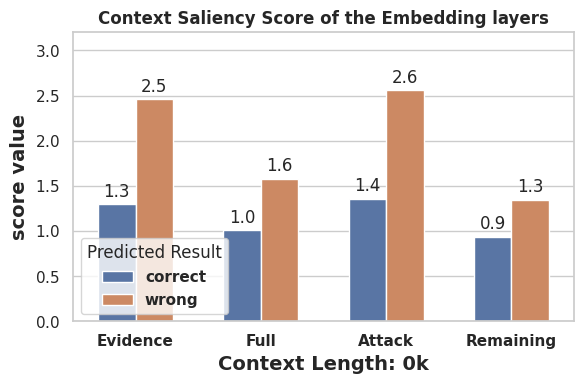

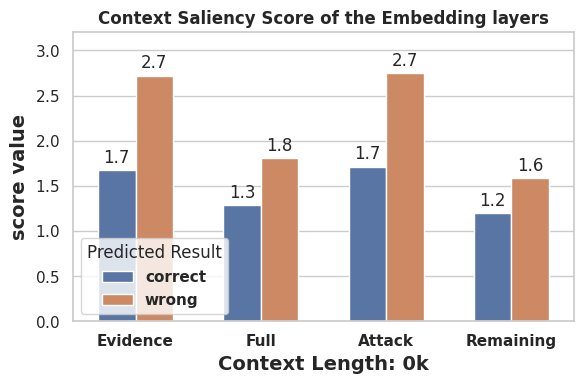

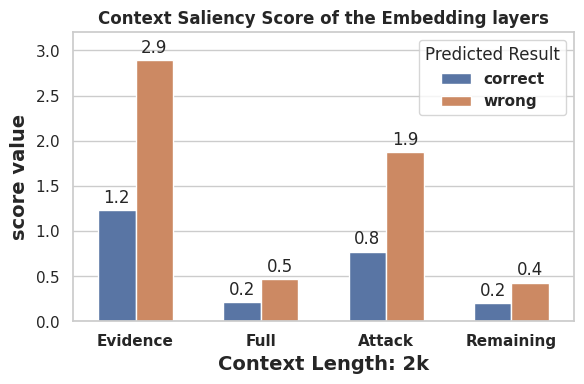

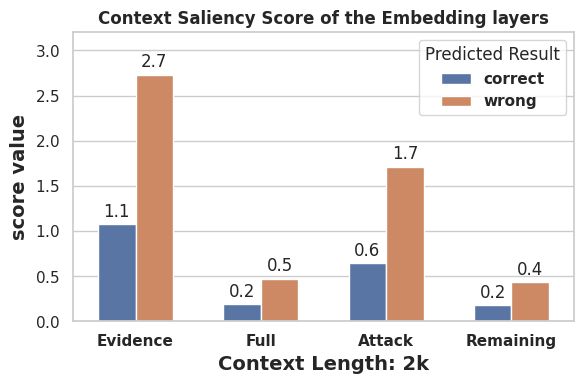

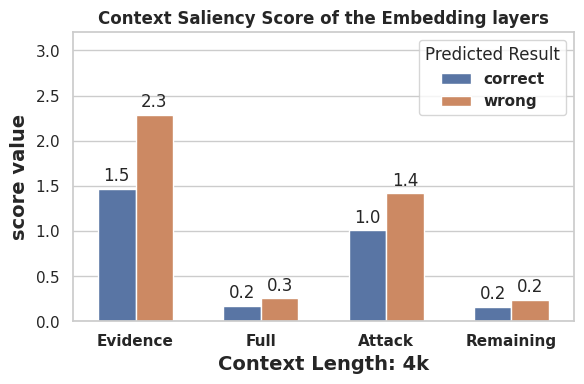

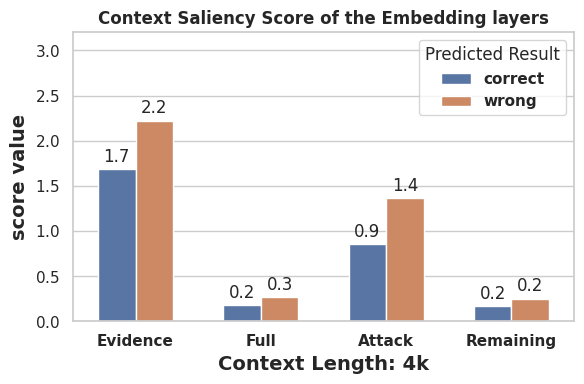

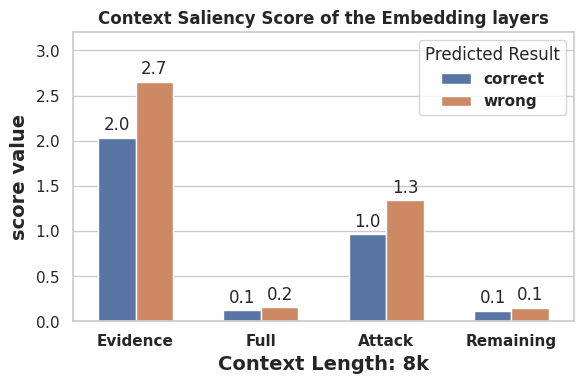

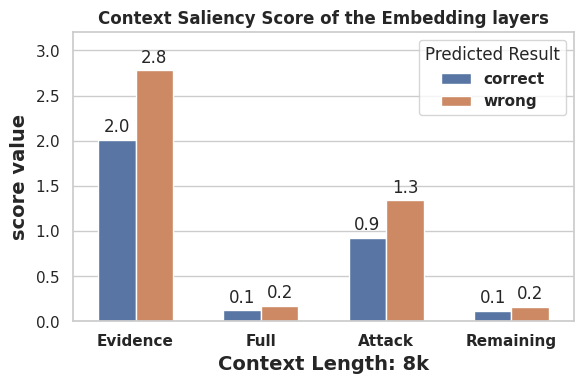

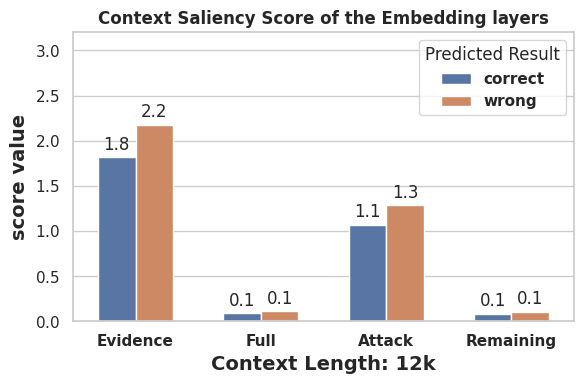

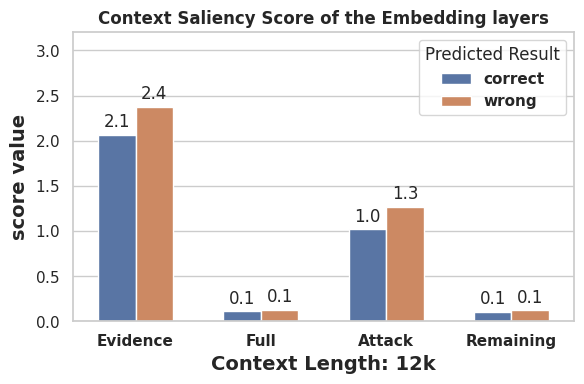

In [122]:


context_length = "12k"

for context_length in ['0k','2k','4k','8k','12k']:
    for hop in [3,4]:

        file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/{int(context_length[:-1])*1000-100}/ce"
        
        # file_dir = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal/Meta-Llama-3.1-8B-Instruct/1900/ce"
        # context_length = "2k"
        # file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/{int(context_length[:-1])*1000-100}/ce"
        file_dir = f"/data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/{max(0, int(context_length[:-1])*1000-100)}/label"
        prefix = f"{hop}-hop*"
        all_files = auto_read_dir(file_dir, file_prefix=prefix)
        i = 0
        all_files = [os.path.join(file_dir, x) for x in all_files]
        
        final_scores=[]


        for score in [100,0]:
            all_predictions = []
            labels = []

            all_layer_scores = [0, 0, 0, 0]
            sample_numbers = 0
            for file in tqdm(all_files):
                settings = os.path.basename(file).split("_")
                hop, depth = settings[0], settings[1]
                label = hop.split("-")[-1].lower()
                content = auto_read_data(file)
                if content['score'] != score:continue
                sample_numbers += 1
                if content['score'] == 0:
                    all_predictions.append(0)
                    
                else:
                    all_predictions.append(1)
                            
                # print(content['pred_res'], content['score'])
                # print(content[0])
                # break
                # 提取数据
                for i, s in enumerate(content['embedding']['score']):
                    all_layer_scores[i] += s
            
            for i in range(len(all_layer_scores)):
                all_layer_scores[i]/= sample_numbers
            print(all_layer_scores,sample_numbers)
            final_scores.append(tuple(all_layer_scores))



        import seaborn as sns
        import matplotlib.pyplot as plt
        import pandas as pd
        import numpy as np

        from matplotlib.ticker import ScalarFormatter
        from matplotlib.patches import FancyBboxPatch
        # 示例数据
        data = pd.DataFrame({
            'Context Type': ['Evidence', 'Full', 'Attack', 'Remaining'],
            'correct': final_scores[0],
            'wrong': final_scores[1],
        })



        # 将数据转换为长格式
        data_melted = data.melt(id_vars='Context Type', var_name='Predicted Result', value_name='Mean Weight')

        # 设置Seaborn主题
        sns.set_theme(style="whitegrid")

        # 创建分组柱状图
        plt.figure(figsize=(6, 4))
        bar_plot = sns.barplot(x='Context Type', y='Mean Weight', hue='Predicted Result', data=data_melted,
                                # palette="viridis",
                                # palette = 'whitegrid',
                                width = 0.6)

        # # plt.ylim([0.04,0.06])
        # for patch in bar_plot.patches:
        #     # 获取矩形的位置和尺寸
            
        #     # 隐藏原始矩形柱
        #     x, y, width, height = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()
            
        #     # 创建圆角矩形
        #     rounded_rect = FancyBboxPatch(
        #         (x, y), width, height, 
        #         boxstyle="round,pad=0.05,rounding_size=0.05",  # 调整 pad 和 rounding_size
        #         edgecolor="blue", 
        #         facecolor=patch.get_facecolor(),
        #         linewidth=0
        #     )
            
        #     # 添加到当前的绘图区
        #     bar_plot.add_patch(rounded_rect)

        # 添加标题和标签
        plt.title(f'Context Saliency Score of the Embedding layers', fontsize=12, fontweight='bold')
        plt.xlabel(f'Context Length: {context_length}', fontsize=14, fontweight = 'bold')
        plt.ylabel('score value', fontsize=14, fontweight = 'bold')
        plt.ylim(0,3.2)
        # 调整x轴标签的旋转角度

        bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')

        # 添加数值标签
        cnt = 0
        for p in bar_plot.patches:
            cnt+=1
            f = format(p.get_height(), '.1f')#.rstrip('0').rstrip('.')
            if p.get_height() == 0.:f = ''
            bar_plot.annotate(f, 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')

        plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) #科学计数法
        plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))


        # 显示图例
        # plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
        if context_length == '0k':
            loc = 'lower left'
        else:
            loc = 'upper right'
        plt.legend(title = 'Predicted Result', loc = loc, prop={'weight': 'bold'})
        # 调整布局
        plt.tight_layout()
        plt.savefig(f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/figure/embedding/{'_'.join(file_dir.split('/')[-3:]) + '_' + prefix[:-1]}.pdf")
        # 显示图表
        # plt.show()